# Materials Project Battery Data Exploration (MSE 542/CHEM441 Group Project)

Team Members: Stephanie Tarczynski, Phong Huynh, Brianna Azabache, Madeleine Walker, Ryan van der Hoeven

## Section 1: The Dataset

### Acquisition of the dataset

Our dataset was acquired through the Materials Project database (https://materialsproject.org/#search/batteries). To limit the scope of our project but still give us a reasonable about of data to work with, our dataset focuses on five common metallic working ions in batteries: Zinc (Zn), Aluminum (Al), Magnesium (Mg), Potassium (K) and Lithium (Li). The Materials Project provided us with a wide variety of battery compositions that included these five main working ions and basic battery characteristics associated with each composition: Voltage (V), gravimetric capacity (mAh/g), volumetric capacity (Ah/L), specific energy (Wh/kg) and energy density (Wh/L).  

### Explorative analysis of the data

To gain a better understanding of our data, we had to perform some preliminary research on the terminology and what was included in the dataset we extracted. Some basic terminology includes:



*   Voltage: The open-circuit voltage is the voltage available from a battery with no current flow. This represents the battery's maximum voltage.
*   Capacity (Gravimetric and Volumetric): Capacity is a measure of the total charge stored in a battery. Gravimetric capacity refers to per weight of battery cell and volumetric capacity refers to per volume of battery cell.
*   Specific Energy: The nominal battery energy per unit mass. This determines the weight of the battery required to achieve a certain total energy.
*   Energy Density: The nominal battery energy per unit volume. This determines the size of the battery required to achieve a certain total energy.

After the initial data extraction, we wanted to add more data to the csv file that would provide us with more control over the data organization and visualization. The added data includes:



*   Maximum number of working ions: Many compositions had a variable number of working ions, so we decided to extract and utilize the maximum number of working ions for each composition.
*   Working ion number: Every composition in our dataset uses one of the five metallic working ions. Each one of these working ions is associated with a number: Zinc = 1, Aluminum = 2, Magnesium = 3, Potassium = 4, Lithium = 5. 
*   Number of __ ions: We wanted to keep a count of every ion used in our dataset, so we have tallied each ion for every composition and appended this information into our main dataset.
*   Level of each data columns: To break down our data further, we categorized the values from the original 5 data columns (voltage, gravimetric and volumetric capacity, specific energy and energy density) into the following categories: High, mid, and low.  High indicates that the value is at least 1 standard deviation higher than the mean, low is at least 1 standard deviation below the mean, and mid values fall within 1 standard deviation of the mean.







### Hypothesis and questions to explore using the dataset

We believe that there are various patterns within our data that are indicative of how different ions and compositions can affect battery performance. 

To explore the validity of this idea, listed below are some of the main questions we wanted to explore with our project:
*   Which metallic working ion is associated with the best battery performance?
*   Are there patterns and/or correlations between certain battery compositions and performance? What are they?





### Feature selection

The following table defines the features in the original dataset that were used in data analysis. Voltage, Capacity Grav, Capacity Vol, Specific E and E Density are all properties related to battery performance. This project further investigates how these properites are related to the composition given by the Reduced Cell Formula for each battery


| Column Name           | Unit       |  Description                            |
|-----------------------|------------|-----------------------------------------|
|Reduced Cell Formula   |            |Battery Molecular Formula
|Working Ion            |            |Free Electrons in Battery Cell
|Average Voltage        |V           |Voltage of Battery Cell
|Capacity Grav          |mAh g^-1    |Gravimetric Capacity
|Capacity Vol           |Ah L^-1     |Volumetric Capacity
|Specific E             |Wh/kg       |Energy per unit molecular mass
|E Density              |Wh/L        |Energy per unit volume



### Cleaning/Processing

Include explanation of cleaning/processing: removing unneeded cells, seperating the data into working ion data sets, manual entry of element compositions

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

In [12]:
df = pd.read_csv('./Materials Project Battery Data-Final.csv')
df=df.fillna(0)

In [13]:
df.keys()

Index(['Reduced Cell Formula', 'Working Ion', 'nZn_max', 'nAl_max', 'nMg_max',
       'nK_max', 'nLi_max', 'n_alkaline_earth_metals', 'n_lanthanoids',
       'n_metalloids', 'n_post_transition_metals', 'n_reactive_nonmetals',
       'n_transition_metals', 'n_alkali_metals', 'n_actinoids', 'nBe', 'nSr',
       'nBa', 'nCa', 'nPr', 'nHo', 'nCe', 'nTb', 'nGd', 'nLa', 'nLu', 'nNd',
       'nSi', 'nGe', 'nTe', 'nSb', 'nAs', 'nSn', 'nBi', 'nGa', 'nO', 'nP',
       'nS', 'nF', 'nI', 'nSe', 'nN', 'nH', 'nCl', 'nBr', 'nCu', 'nV', 'nFe',
       'nTi', 'nCr', 'nMn', 'nNi', 'nCo', 'nW', 'nMo', 'nTa', 'nNb', 'nZr',
       'nSc', 'nRe', 'nIr', 'nAg', 'nTc', 'nY', 'nNa', 'nLi', 'nRb', 'nCs',
       'nU', 'Average Voltage', 'V_level_overall', 'Capacity Grav',
       'C_grav_level_overall', 'Capacity Vol', 'C_vol_level_overall',
       'Specific E Wh/kg', 'specific_e_level_overall', 'E Density Wh/l',
       'e_density_level_overall', 'Working_Ion_Number', 'Working_Ion'],
      dtype='object')

The table below shows the columns in the dataset that were added manually into the original file to support our investigation. 

Based off the reduced cell formula, the composition of each battery was broken down into the number of other elements in the battery cell, for example: nO (number of oxygen atoms), nSe (number of selenium atoms). Since there is such a wide distribution of different atoms in each battery cell, there are a lot of zeroes in the data and some atoms are only present in a few batteries. In order to get more datapoints, the atom counts were also grouped into number of atoms per an elemental group of the periodic table as well (i.e., number of reactive nonmetals, number of transition metals).

The properties of the batteries- voltage, capacity, and energy were grouped into qualitative categories for machine learning prediction purposes. This was based off the distribution and standard deviation of each property. This was done on a per working ion basis- i.e. "high" and "low" relative to zinc or lithium batteries only first. The "overall" level was also calculated and refers to the level based of the entire dataset distribution.

| Column Name           | Unit       |  Description                            |
|-----------------------|------------|-----------------------------------------|
|n*working ion*_max     |#           |Max number of workion ion atoms in battery
|n*element*             |#           |Number of atoms of element in battery
|n_*element_group*       |#           |Number of atoms in a specified group of elements in a battery
|V_level_overall        |Qualitative |Category of capacity level (Low, Med,  High) based off distribution of entire dataset
|C_grav/C_vol level_overall|Qualitative|Category of capacity level (Low, Med,  High) based off distribution of entire dataset
|E Density/Specific E level_overall|Qualitative|Category of energy level (Low, Med,  High) based off distribution of entire dataset

The following table shows the ranges used for each feature to group the properties of the data.  The graphs below use average voltage as an example to show the range of properties between the five working ions, although the other features of capacity grav, capacity vol, specific energy, and energy density were also grouped using the same methodology to determine low, mid, and high groupings.

Plotting the average volage range for each working ion with the mean working voltage for the dataset overlaid allows us to see generally where the average voltage for the different working ions falls in relation to the overall distribution of the average voltage.  The black horizontal line shows the mean of the average voltage for all working ions, the upper bound in red is one standard deviation above the mean, and the lower bound in blue is one standard deviation below the mean.  On the far ends of the distribution, we have battery cells with a zinc working ion, and battery cells with a lithium working ion.  For a working ion of zinc, the average voltage is relatively low compared to the other working ions, with the majority of the zinc batteries falling in the "mid" and "low" categories.  Lithium, on the other hand, produces relatively high average voltage with most falling into the "mid" and "high" categories.    

| Description|Voltage [V]|Grav Capacity [mAh g^-1]|Vol Capacity [Ah L^-1]|Specific Energy [Wh/kg]|Energy Density [Wh/L]       
|-|-|-|-|-|-|
|"Low" |Below 0.6 |Below -80 |Below -31  |Below 13  |Below 103  |
|"Mid" |0.6 to 3.6|-80 to 526|-31 to 1874|13 to 680 |103 to 2849|
|"High"|Above 3.6 |Above 526 |Above 1874 |Above 680 |Above 2849 | 
|Mean  |2.1       |223       |922        |346       |1476       |

In [14]:
Zn_df = df.loc[df['Working Ion'] =='Zn']
Al_df = df.loc[df['Working Ion'] =='Al']
Mg_df = df.loc[df['Working Ion'] =='Mg']
K_df = df.loc[df['Working Ion'] =='K']
Li_df = df.loc[df['Working Ion'] =='Li']

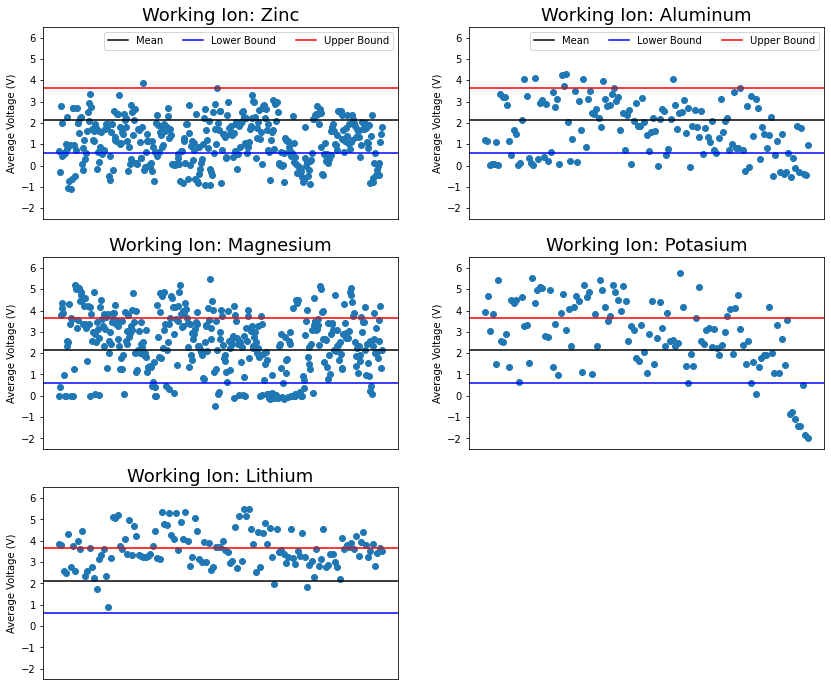

In [15]:


group = plt.figure(figsize=(14, 12))
group.subplots_adjust(hspace=0.2, wspace=0.2)
ax1, ax2, ax3, ax4, ax5, ax6 = group.add_subplot(3, 2, 1), group.add_subplot(3, 2, 2), group.add_subplot(3, 2, 3), group.add_subplot(3, 2, 4), group.add_subplot(3, 2, 5), group.add_subplot(3, 2, 6)
group.delaxes(ax6)

ax1.scatter(np.linspace(0, len(Zn_df), num = len(Zn_df)), Zn_df['Average Voltage'])
ax1.axhline(y = df['Average Voltage'].mean(), c = 'black', label = 'Mean')
ax1.axhline(y = df['Average Voltage'].mean() - df['Average Voltage'].std(), c = 'blue', label = 'Lower Bound')
ax1.axhline(y = df['Average Voltage'].mean() + df['Average Voltage'].std(), c = 'red', label = 'Upper Bound')
ax1.set_xticks([])
ax1.set_title('Working Ion: Zinc', fontsize = 18)
ax1.set_ylabel('Average Voltage (V)')
ax1.set_ylim(-2.5,6.5)
ax1.legend(ncol = 3)

ax2.scatter(np.linspace(0, len(Al_df), num = len(Al_df)), Al_df['Average Voltage'])
ax2.axhline(y = df['Average Voltage'].mean(), c = 'black', label = 'Mean')
ax2.axhline(y = df['Average Voltage'].mean() - df['Average Voltage'].std(), c = 'blue', label = 'Lower Bound')
ax2.axhline(y = df['Average Voltage'].mean() + df['Average Voltage'].std(), c = 'red', label = 'Upper Bound')
ax2.set_xticks([])
ax2.set_title('Working Ion: Aluminum', fontsize = 18)
ax2.set_ylabel('Average Voltage (V)')
ax2.set_ylim(-2.5,6.5)
ax2.legend(ncol = 3)

ax3.scatter(np.linspace(0, len(Mg_df), num = len(Mg_df)), Mg_df['Average Voltage'])
ax3.axhline(y = df['Average Voltage'].mean(), c = 'black')
ax3.axhline(y = df['Average Voltage'].mean() - df['Average Voltage'].std(), c = 'b')
ax3.axhline(y = df['Average Voltage'].mean() + df['Average Voltage'].std(), c = 'r')
ax3.set_xticks([])
ax3.set_title('Working Ion: Magnesium', fontsize = 18)
ax3.set_ylabel('Average Voltage (V)')
ax3.set_ylim(-2.5,6.5)

ax4.scatter(np.linspace(0, len(K_df), num = len(K_df)), K_df['Average Voltage'])
ax4.axhline(y = df['Average Voltage'].mean(), c = 'black')
ax4.axhline(y = df['Average Voltage'].mean() - df['Average Voltage'].std(), c = 'b')
ax4.axhline(y = df['Average Voltage'].mean() + df['Average Voltage'].std(), c = 'r')
ax4.set_xticks([])
ax4.set_title('Working Ion: Potasium', fontsize = 18)
ax4.set_ylabel('Average Voltage (V)')
ax4.set_ylim(-2.5,6.5)

ax5.scatter(np.linspace(0, len(Li_df), num = len(Li_df)), Li_df['Average Voltage'])
ax5.axhline(y = df['Average Voltage'].mean(), c = 'black')
ax5.axhline(y = df['Average Voltage'].mean() - df['Average Voltage'].std(), c = 'b')
ax5.axhline(y = df['Average Voltage'].mean() + df['Average Voltage'].std(), c = 'r')
ax5.set_xticks([])
ax5.set_title('Working Ion: Lithium', fontsize = 18)
ax5.set_ylabel('Average Voltage (V)')
ax5.set_ylim(-2.5,6.5);

In [16]:
df

,Reduced Cell Formula,Working Ion,nZn_max,nAl_max,nMg_max,nK_max,nLi_max,n_alkaline_earth_metals,n_lanthanoids,n_metalloids,...,Capacity Grav,C_grav_level_overall,Capacity Vol,C_vol_level_overall,Specific E Wh/kg,specific_e_level_overall,E Density Wh/l,e_density_level_overall,Working_Ion_Number,Working_Ion
0,ZnV4(CuO4)3,Zn,1.0,0.0,0.0,0.0,0.0,0,0,0,...,82,Mid,443,Mid,54,Mid,294,Mid,1,Zn
1,ZnV3(P2O7)2,Zn,1.0,0.0,0.0,0.0,0.0,0,0,0,...,95,Mid,346,Mid,-30,Low,-109,Low,1,Zn
2,ZnV3(FeO6)2,Zn,1.0,0.0,0.0,0.0,0.0,0,0,0,...,97,Mid,366,Mid,271,Mid,1028,Mid,1,Zn
3,ZnV2(PO4)3,Zn,1.0,0.0,0.0,0.0,0.0,0,0,0,...,166,Mid,627,Mid,334,Mid,1263,Mid,1,Zn
4,ZnV(SiO3)2,Zn,1.0,0.0,0.0,0.0,0.0,0,0,2,...,200,Mid,760,Mid,89,Mid,337,Mid,1,Zn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,Li0 –3Co3NiO8,Li,0.0,0.0,0.0,0.0,3.0,0,0,0,...,209,Mid,1048,Mid,807,High,4039,High,5,Li
1187,Li4 –6Co3Ni5O16,Li,0.0,0.0,0.0,0.0,6.0,0,0,0,...,70,Mid,345,Mid,197,Mid,974,Mid,5,Li
1188,Li4 –6Co5Ni3O16,Li,0.0,0.0,0.0,0.0,6.0,0,0,0,...,70,Mid,348,Mid,239,Mid,1191,Mid,5,Li
1189,Li0 –4Co5NiO12,Li,0.0,0.0,0.0,0.0,4.0,0,0,0,...,187,Mid,867,Mid,686,High,3179,High,5,Li


In [17]:
# We are dropping rows with missing data on the columns: Average voltage, Capacity Grav, Capacity Vol, Specific E, and E density.
df= df.dropna(subset=['Working Ion','Average Voltage', 'Capacity Grav', 'Capacity Vol', 'Specific E Wh/kg', 'E Density Wh/l'])
df

,Reduced Cell Formula,Working Ion,nZn_max,nAl_max,nMg_max,nK_max,nLi_max,n_alkaline_earth_metals,n_lanthanoids,n_metalloids,...,Capacity Grav,C_grav_level_overall,Capacity Vol,C_vol_level_overall,Specific E Wh/kg,specific_e_level_overall,E Density Wh/l,e_density_level_overall,Working_Ion_Number,Working_Ion
0,ZnV4(CuO4)3,Zn,1.0,0.0,0.0,0.0,0.0,0,0,0,...,82,Mid,443,Mid,54,Mid,294,Mid,1,Zn
1,ZnV3(P2O7)2,Zn,1.0,0.0,0.0,0.0,0.0,0,0,0,...,95,Mid,346,Mid,-30,Low,-109,Low,1,Zn
2,ZnV3(FeO6)2,Zn,1.0,0.0,0.0,0.0,0.0,0,0,0,...,97,Mid,366,Mid,271,Mid,1028,Mid,1,Zn
3,ZnV2(PO4)3,Zn,1.0,0.0,0.0,0.0,0.0,0,0,0,...,166,Mid,627,Mid,334,Mid,1263,Mid,1,Zn
4,ZnV(SiO3)2,Zn,1.0,0.0,0.0,0.0,0.0,0,0,2,...,200,Mid,760,Mid,89,Mid,337,Mid,1,Zn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,Li0 –3Co3NiO8,Li,0.0,0.0,0.0,0.0,3.0,0,0,0,...,209,Mid,1048,Mid,807,High,4039,High,5,Li
1187,Li4 –6Co3Ni5O16,Li,0.0,0.0,0.0,0.0,6.0,0,0,0,...,70,Mid,345,Mid,197,Mid,974,Mid,5,Li
1188,Li4 –6Co5Ni3O16,Li,0.0,0.0,0.0,0.0,6.0,0,0,0,...,70,Mid,348,Mid,239,Mid,1191,Mid,5,Li
1189,Li0 –4Co5NiO12,Li,0.0,0.0,0.0,0.0,4.0,0,0,0,...,187,Mid,867,Mid,686,High,3179,High,5,Li


### Visualization of the original data


#### Feature Correlation

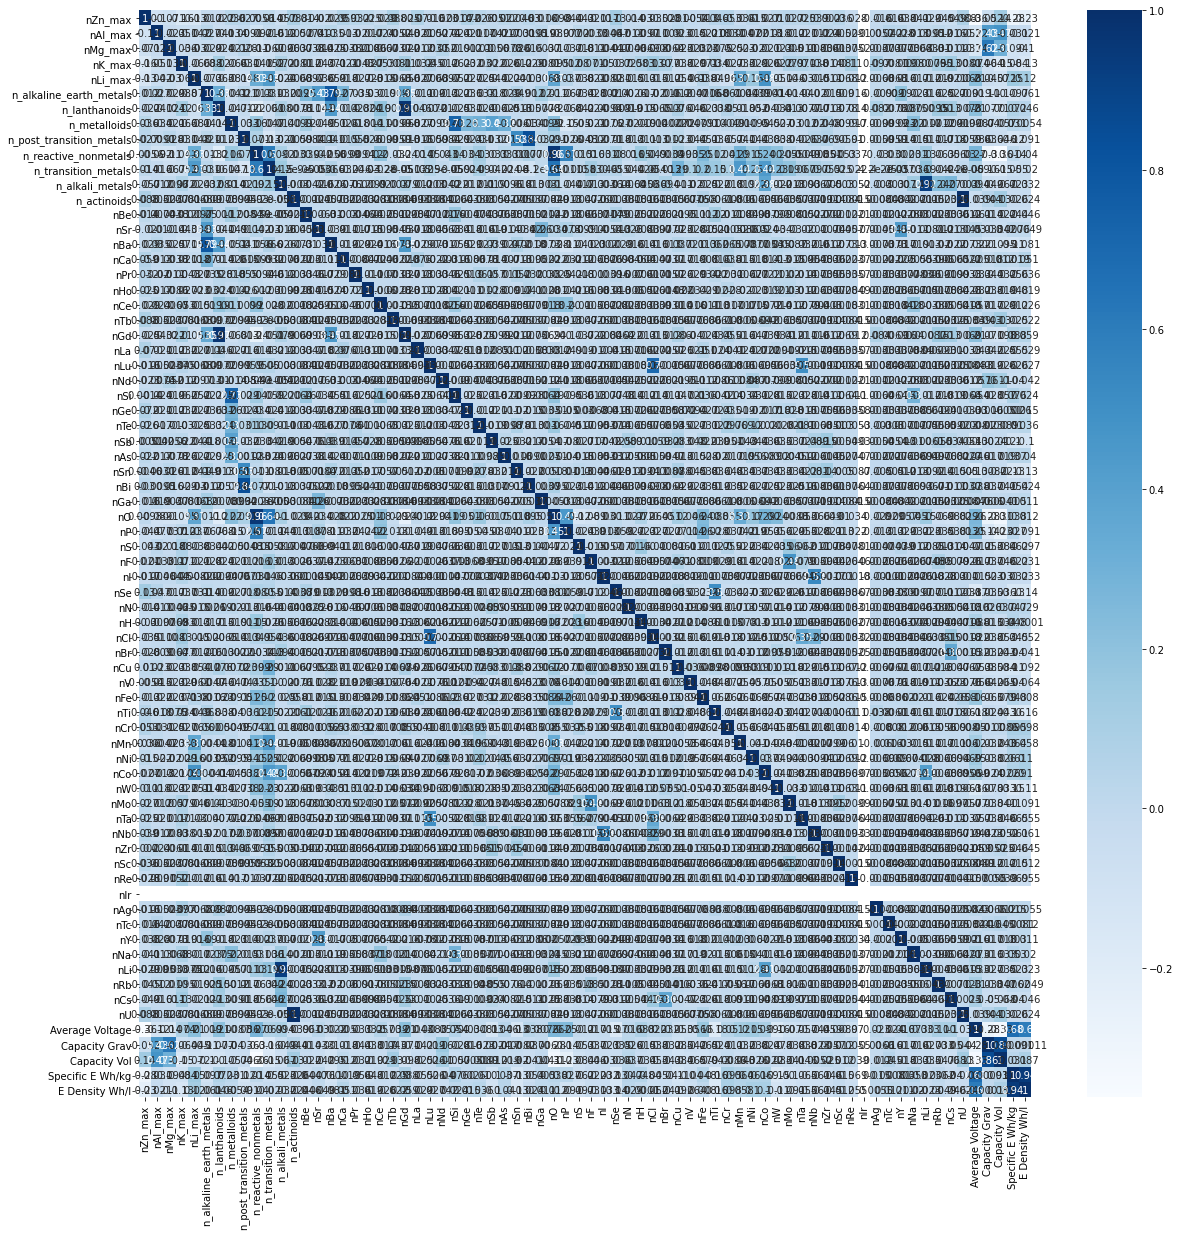

In [18]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()


Looking at the correlation figure above, there are far too many values to effectively process what information is being displayed. To deal with this, we can focus the technique onto smaller sections of the data. 

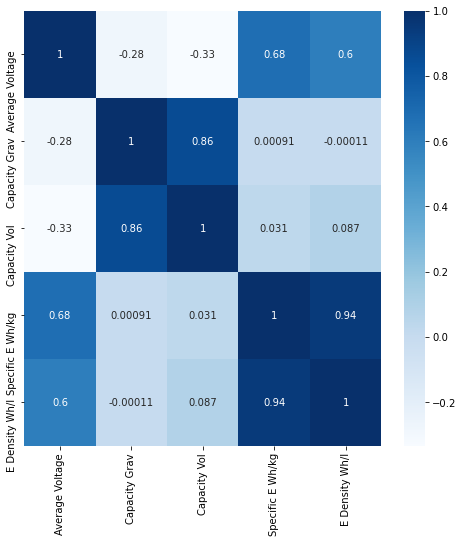

In [19]:
df_original = df[['Average Voltage', 'Capacity Grav', 'Capacity Vol', 'Specific E Wh/kg', 'E Density Wh/l']]
df_original

plt.figure(figsize=(8,8))
cor2 = df_original.corr()
sns.heatmap(cor2, annot=True, cmap=plt.cm.Blues)
plt.show()

We can also see the correlations between the five principal features from the original dataset, and the element group compositions of the batteries.

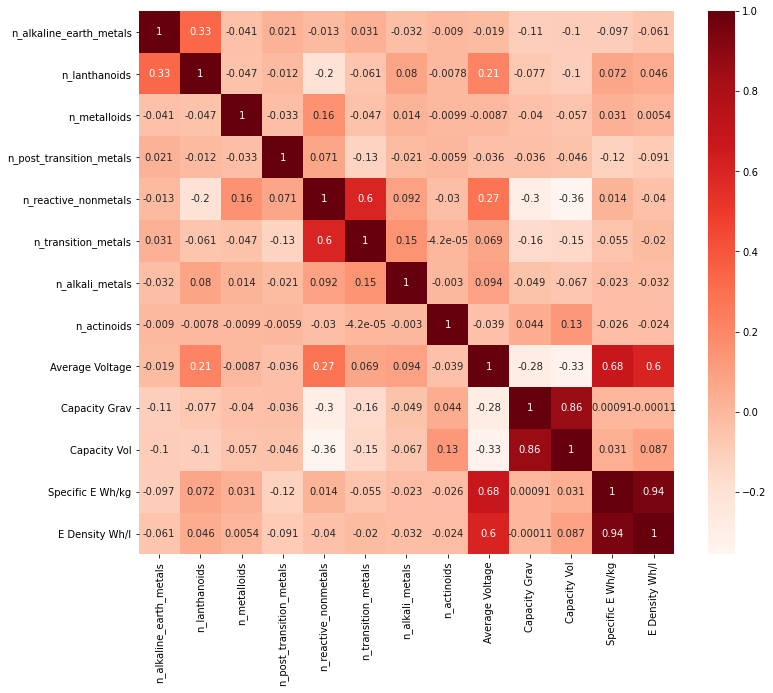

In [20]:
sub = df[['Working_Ion', 'n_alkaline_earth_metals', 'n_lanthanoids','n_metalloids', 'n_post_transition_metals', 'n_reactive_nonmetals', 'n_transition_metals', 'n_alkali_metals', 'n_actinoids', 'Average Voltage', 'Capacity Grav', 'Capacity Vol', 'Specific E Wh/kg', 
       'E Density Wh/l']].copy()
sub.dropna(inplace=True)

fig10 = plt.figure(figsize=(12,10))
cor = sub.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Property Distribution

The performance metric distribution is shown below sorted by working ion. Since the energy and capacity per volume/weight are so closely related (as will be shown later through linear regression) only one or the other is analyzed in some cases.

##### Voltage

Range of Average Voltage: -1.98 5.77


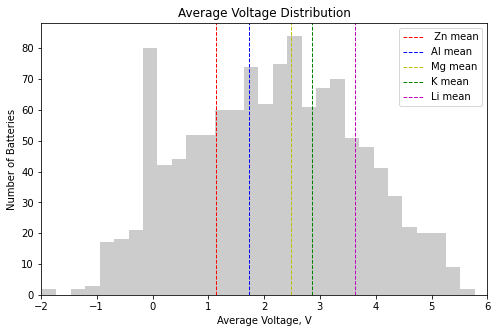

<Figure size 576x360 with 0 Axes>

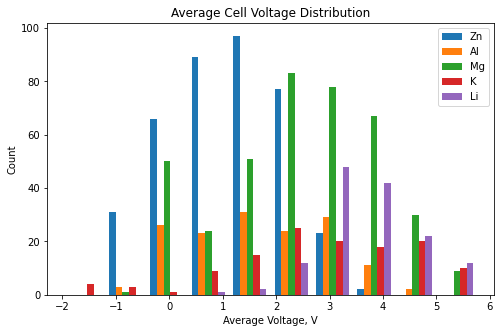

In [21]:
plt.figure(figsize=(8,5))
n_bins= 30

plt.hist(df['Average Voltage'], color = 'k', bins=n_bins, alpha = 0.2)
plt.axvline(Zn_df['Average Voltage'].mean(), color='r', linestyle='dashed', linewidth=1, label = ' Zn mean')
plt.axvline(Al_df['Average Voltage'].mean(), color='b', linestyle='dashed', linewidth=1, label = 'Al mean')
plt.axvline(Mg_df['Average Voltage'].mean(), color='y', linestyle='dashed', linewidth=1, label = 'Mg mean')
plt.axvline(K_df['Average Voltage'].mean(), color='g', linestyle='dashed', linewidth=1, label = 'K mean')
plt.axvline(Li_df['Average Voltage'].mean(), color='m', linestyle='dashed', linewidth=1, label = 'Li mean')

plt.legend()
plt.xlim(-2,6)
plt.ylabel('Number of Batteries')
plt.xlabel('Average Voltage, V')
plt.title('Average Voltage Distribution')

plt.figure(figsize=(8,5))
n_bins= 30

print("Range of Average Voltage:", df['Average Voltage'].min(), df['Average Voltage'].max())

plt.figure(figsize=(8,5))
plt.title('Average Cell Voltage Distribution')
plt.xlabel('Average Voltage, V')
plt.ylabel('Count')
plt.hist([Zn_df['Average Voltage'], Al_df['Average Voltage'], Mg_df['Average Voltage'], K_df['Average Voltage'], Li_df['Average Voltage']], alpha =1, label=['Zn', 'Al', 'Mg', 'K', 'Li'])
plt.legend()

##### Capacity

Range of Capacity Vol: 24 7619


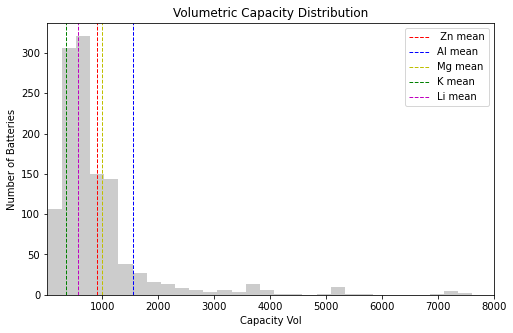

<Figure size 576x360 with 0 Axes>

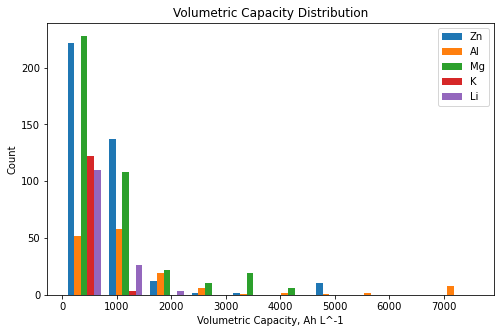

In [22]:
plt.figure(figsize=(8,5))
n_bins= 30

plt.hist(df['Capacity Vol'], color = 'k', bins=n_bins, alpha = 0.2)
plt.axvline(Zn_df['Capacity Vol'].mean(), color='r', linestyle='dashed', linewidth=1, label = ' Zn mean')
plt.axvline(Al_df['Capacity Vol'].mean(), color='b', linestyle='dashed', linewidth=1, label = 'Al mean')
plt.axvline(Mg_df['Capacity Vol'].mean(), color='y', linestyle='dashed', linewidth=1, label = 'Mg mean')
plt.axvline(K_df['Capacity Vol'].mean(), color='g', linestyle='dashed', linewidth=1, label = 'K mean')
plt.axvline(Li_df['Capacity Vol'].mean(), color='m', linestyle='dashed', linewidth=1, label = 'Li mean')

plt.legend()
plt.xlim(20,8000)
plt.ylabel('Number of Batteries')
plt.xlabel('Capacity Vol')
plt.title('Volumetric Capacity Distribution')

plt.figure(figsize=(8,5))
n_bins= 30

print("Range of Capacity Vol:", df['Capacity Vol'].min(), df['Capacity Vol'].max())

plt.figure(figsize=(8,5))
plt.title('Volumetric Capacity Distribution')
plt.xlabel('Volumetric Capacity, Ah L^-1')
plt.ylabel('Count')
plt.hist([Zn_df['Capacity Vol'], Al_df['Capacity Vol'], Mg_df['Capacity Vol'], K_df['Capacity Vol'], Li_df['Capacity Vol']], alpha =1, label=['Zn', 'Al', 'Mg', 'K', 'Li'])
plt.legend()

##### Energy

Range of Specific E: -537 2867


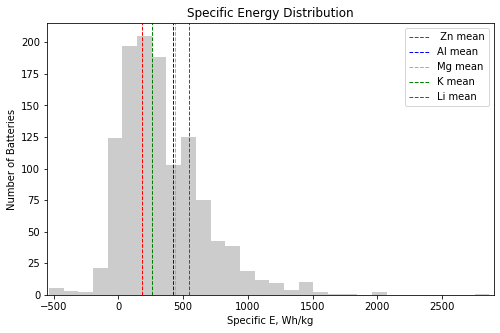

<Figure size 576x360 with 0 Axes>

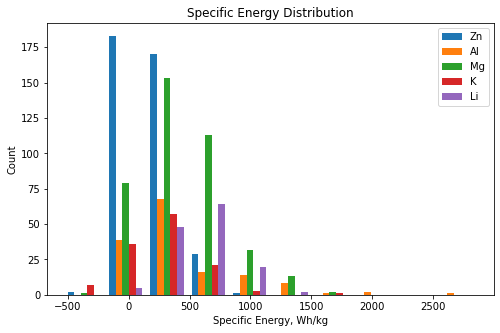

In [23]:
plt.figure(figsize=(8,5))
n_bins= 30

plt.hist(df['Specific E Wh/kg'], color = 'k', bins=n_bins, alpha = 0.2)
plt.axvline(Zn_df['Specific E Wh/kg'].mean(), color='r', linestyle='dashed', linewidth=1, label = ' Zn mean')
plt.axvline(Al_df['Specific E Wh/kg'].mean(), color='b', linestyle='dashed', linewidth=1, label = 'Al mean')
plt.axvline(Mg_df['Specific E Wh/kg'].mean(), color='y', linestyle='dashed', linewidth=1, label = 'Mg mean')
plt.axvline(K_df['Specific E Wh/kg'].mean(), color='g', linestyle='dashed', linewidth=1, label = 'K mean')
plt.axvline(Li_df['Specific E Wh/kg'].mean(), color='m', linestyle='dashed', linewidth=1, label = 'Li mean')

plt.legend()
plt.xlim(-550,2900)
plt.ylabel('Number of Batteries')
plt.xlabel('Specific E, Wh/kg')
plt.title('Specific Energy Distribution')

plt.figure(figsize=(8,5))
n_bins= 30

print("Range of Specific E:", df['Specific E Wh/kg'].min(), df['Specific E Wh/kg'].max())

plt.figure(figsize=(8,5))
plt.title('Specific Energy Distribution')
plt.xlabel('Specific Energy, Wh/kg')
plt.ylabel('Count')
plt.hist([Zn_df['Specific E Wh/kg'], Al_df['Specific E Wh/kg'], Mg_df['Specific E Wh/kg'], K_df['Specific E Wh/kg'], Li_df['Specific E Wh/kg']], alpha =1, label=['Zn', 'Al', 'Mg', 'K', 'Li'])
plt.legend()

## Section 2: Methods 
Machine learning builds mathematical models to help understand data. The models are used to predict and/or understand aspects of newly observed data. There are two types of machine learning: supervised and unsupervised. Supervised learning predicts labels based on labeled training data, and unsupervised learning identifies structures in unlabeled data. Furthermore, there are subcategories for the two types of machine learning. For supervised learning, there is classification and regression. For unsupervised learning, there is clustering, dimensionality reduction, and self-organizing map (SOM). This notebook explores three different subcategories: regression, clustering, and SOM.

### Method 1: Linear Regression
The regression method is utilized, to be more specific, linear regression. Regression models predict continuous labels. Linear regression models a linear relationship between a dependent (y) and an independent (x) variable. The variables must be numerical, so y and x cannot be categorical. Moreover, the linear relationship was tested by calculating $R^2$. $R^2$ is a metric for the level of correlation between two sets of data (or features). It shows the quality of the fitting. $R^2$ = 1 means the model is a perfect fit. Whereas $R^2$ = 0 means none of the variations in the data is accounted for by the model. Furthermore, linear regression was used to see which features had linear relationships, and $R^2$ was a tool to examine the strength of the correlation.

### Method 2: PCA

PCA (Principal Component Analysis) is another unsupervised machine learning method, which is also useful when analyzing a dataset with many features and high variance. Like SOM, it is primarily used for dimensionality reduction, creating more efficient models that are able to generalize beyond the training dataset. PCA uses components or axes to capture variance and create a map where data is projected into space in a way that minizimes the least-squares distance (https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db). PCA helps project correlations between many features to smaller dimensions. Because the feature set is correlated, we looked at features that had previously exhibited correlation. 

Using PCA with various feature inputs helped us better visualize the correlations between features, and which had greater weights in the correlation. In addition, we could better visualize how the working ions were positioned in relation to each other with the simulataneous input of all the features. 

### Method 3: K-Nearest Neighbors

In [24]:
from IPython.display import display, Image
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png')

The K-Nearest Neighbors Classification (KNN) algorithm  is used here for categorical sorting. The composition of the batteries is used as the input and the model uses this algorithm to see if this model could sort batteries into high-level, mid-level, and low-level voltage, energy, and capacity categories as the output. Due to the limiation in data points for the non-working ion atoms, regression fitting was not used since exact values were unlikely and not needed to observe general trends.

A visualization of the KNN algorithm is shown above. The green dot (a new datapoint based off battery composition) is sorted into the blue or red categories (high or low capacity for example) based off it's nearest neighbors.

## Section 3: Results

### Method 1. Linear Regression

#### Linear Regression Ex1: E Density vs. Specific E

R^2 Score:
0.892693428263555


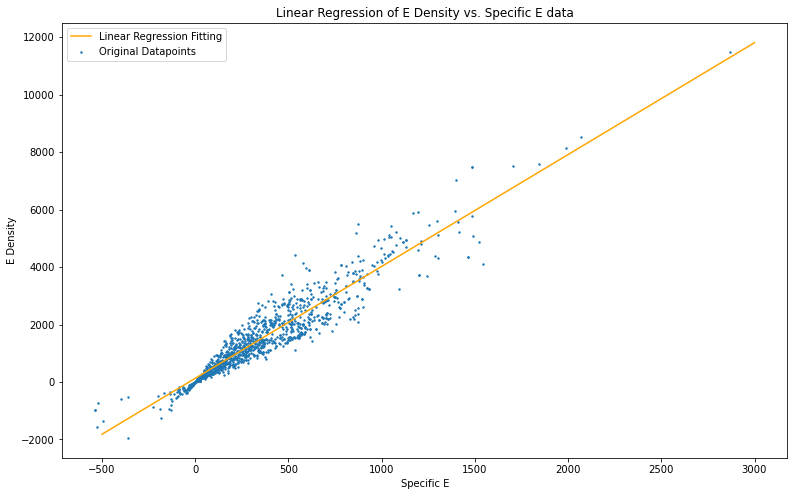

In [25]:

model_2 = linear_model.LinearRegression()
X2 = df[['Specific E Wh/kg']]
y2 = df['E Density Wh/l']
model_2.fit(X2,y2)

xfit2 = np.linspace(-500,3000)
Xfit2 = xfit2[:, np.newaxis] 
yfit2 = model_2.predict(Xfit2)

fig_12 =plt.figure(figsize = (13,8))
plt.scatter(X2, y2, s=2, label='Original Datapoints')
plt.plot(xfit2, yfit2, c='orange', label='Linear Regression Fitting');
plt.legend()
plt.title('Linear Regression of E Density vs. Specific E data')
plt.ylabel('E Density')
plt.xlabel('Specific E')

print("R^2 Score:")
print(r2_score(y2, model_2.predict(df[['Specific E Wh/kg']])))

#fig_12.savefig('figure12.png')

#### Linear Regression Ex2: Average Voltage vs. Specific E

Range df['Specific E Wh/kg']: -537 2867


0.4615837887916632

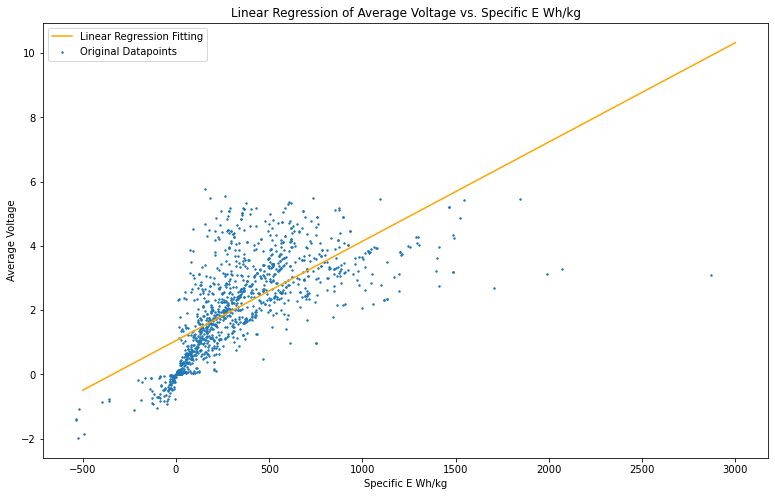

In [26]:
model_4 = linear_model.LinearRegression()
X4 = df[['Specific E Wh/kg']]
y4 = df['Average Voltage']
model_4.fit(X4,y4)
print("Range df['Specific E Wh/kg']:", df['Specific E Wh/kg'].min(), df['Specific E Wh/kg'].max())
xfit4 = np.linspace(-500,3000)
Xfit4 = xfit4[:, np.newaxis] 
yfit4 = model_4.predict(Xfit4)

fig_14 =plt.figure(figsize = (13,8))
plt.scatter(X4, y4, s=2, label='Original Datapoints')
plt.plot(xfit4, yfit4, c='orange', label='Linear Regression Fitting');
plt.legend()
plt.title('Linear Regression of Average Voltage vs. Specific E Wh/kg')
plt.ylabel('Average Voltage')
plt.xlabel('Specific E Wh/kg')

r2_score(y4, model_4.predict(df[['Specific E Wh/kg']]))

#fig_14.savefig('figure14.png')

#### Linear Regression Ex3: Average Voltage vs. Volumetric Capacity

0.11121191801655239

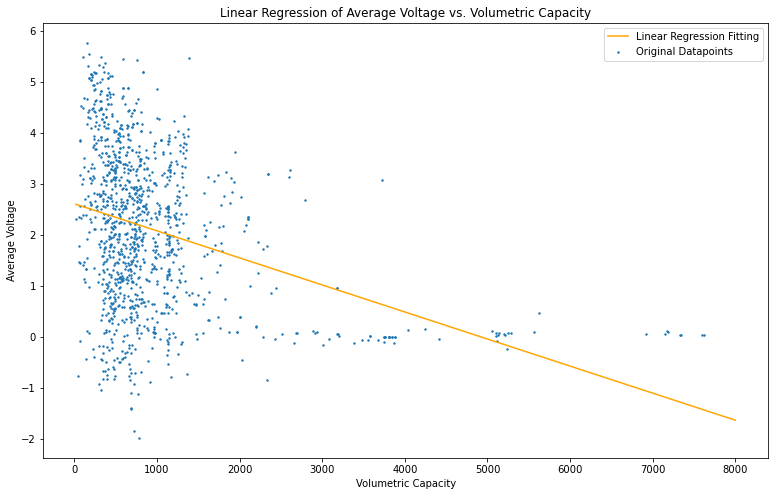

In [27]:
model_5 = linear_model.LinearRegression()
X5 = df[['Capacity Vol']]
y5 = df['Average Voltage']
model_5.fit(X5,y5)
xfit5 = np.linspace(20,8000)
Xfit5 = xfit5[:, np.newaxis] 
yfit5 = model_5.predict(Xfit5)

fig_15 =plt.figure(figsize = (13,8))
plt.scatter(X5, y5, s=2, label='Original Datapoints')
plt.plot(xfit5, yfit5, c='orange', label='Linear Regression Fitting');
plt.legend()
plt.title('Linear Regression of Average Voltage vs. Volumetric Capacity')
plt.ylabel('Average Voltage')
plt.xlabel('Volumetric Capacity')

r2_score(y5, model_5.predict(df[['Capacity Vol']]))

#fig_15.savefig('figure15.png')

#### Linear Regression Ex4: Gravimetric Capacity vs. Volumetric Capacity

R^2 Score:
0.7408852087567807


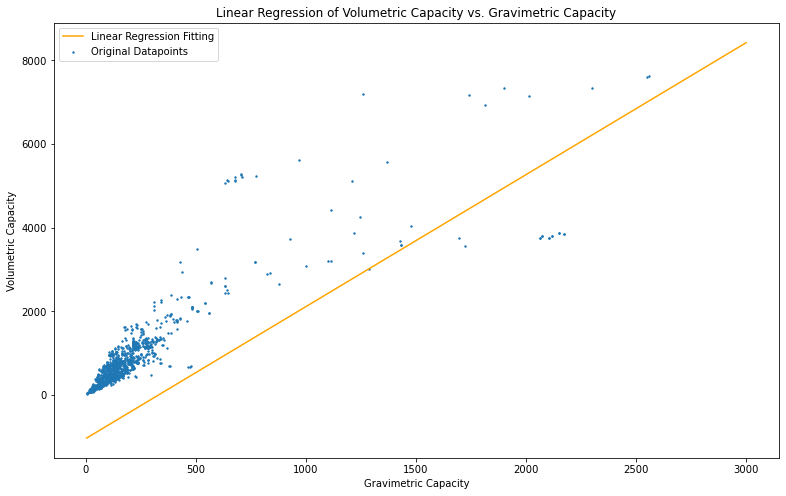

In [28]:
model_3 = linear_model.LinearRegression()
X3 = df[['Capacity Grav']]
y3 = df['Capacity Vol']
model_3.fit(X3,y3)


xfit3 = np.linspace(5,3000)
Xfit3 = xfit3[:, np.newaxis] 
yfit3 = model_3.predict(Xfit2)

fig_13 =plt.figure(figsize = (13,8))
plt.scatter(X3, y3, s=2, label='Original Datapoints')
plt.plot(xfit3, yfit3, c='orange', label='Linear Regression Fitting');
plt.legend()
plt.title('Linear Regression of Volumetric Capacity vs. Gravimetric Capacity')
plt.ylabel('Volumetric Capacity')
plt.xlabel('Gravimetric Capacity')

print("R^2 Score:")
print(r2_score(y3, model_3.predict(df[['Capacity Grav']])))

#fig_13.savefig('figure13.png')

####Linear Regression Analysis:

As mentioned, linear regression models linear relationships between x and y variables. The method was a valuable tool to see which features in the data set had strong correlations. There were four linear regression models: E Density vs. Specific E, Gravimetric Capacity vs. Volumetric Capacity, Average Voltage vs. Specific E, and Average Voltage vs. Volumetric Capacity. After the four plots were designed, the $R^2$ values were calculated and listed: 0.90, 0.74, 0.46, and 0.11. The $R^2$ value of 0.90 showed that E Density had the strongest correlation with Specific E. And the $R^2$ value of 0.11 indicated that Average Voltage had the weakest correlation with the Volumetric Capacity. Since some of the properties do not have a strong linear correlation, this led us to use other machine learning techniques to analyze the data

### Method 2. PCA (Principal Component Analysis)

In [29]:
!pip install kneed 
import numpy as np
import pandas as pd
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

  Using cached kneed-0.7.0-py2.py3-none-any.whl (9.4 kB)


#### PCA Ex. 1: 2 Component PCA Using Atomic Composition

[0.04148686 0.0374948  0.03008894]
0.10907059418443896


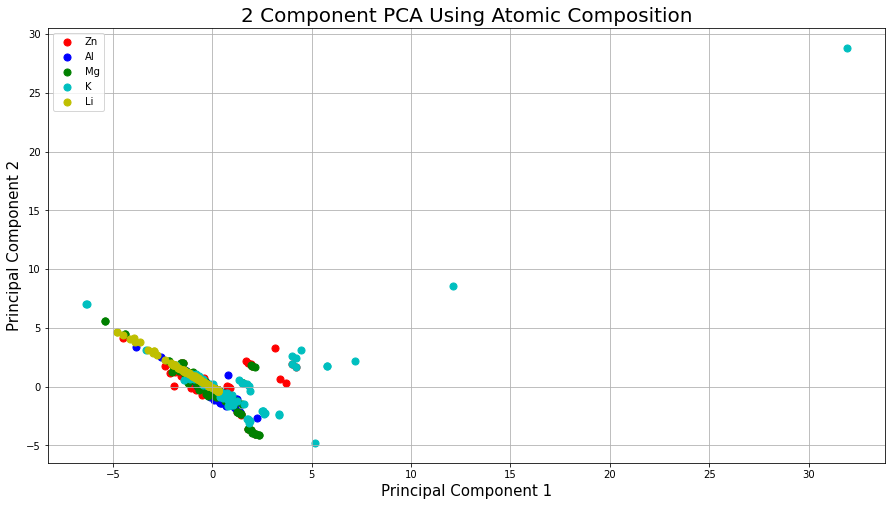

In [30]:
features = ['nBe', 'nSr', 'nBa', 'nCa',
       'nPr', 'nHo', 'nCe', 'nTb', 'nGd', 'nLa',
       'nLu', 'nNd', 'nSi', 'nGe', 'nTe', 'nSb', 'nAs',
       'nSn', 'nBi', 'nGa', 'nO',
       'nP', 'nS', 'nF', 'nI', 'nSe', 'nN', 'nH', 'nCl', 'nBr',
       'nCu', 'nV', 'nFe', 'nTi', 'nCr', 'nMn', 'nNi',
       'nCo', 'nW', 'nMo', 'nTa', 'nNb', 'nZr', 'nSc', 'nRe', 'nIr', 'nAg',
       'nTc', 'nY', 'nNa', 'nLi', 'nRb', 'nCs',
       'nU'] 
target = ['Working_Ion'] #We set this as target because we want to know if the battery atomic compositions will be enough to classify the elements into its category. 
fandt = np.concatenate((features,target),axis=0)

# New dataframe with just the columns of interest
df2 = df.loc[:, fandt]

cleaned_up=df2.fillna(0)

cleaned_up = cleaned_up.reset_index(0)

X = cleaned_up.loc[:,features]
Y = cleaned_up.loc[:,target] 

x = StandardScaler().fit_transform(X.values)

from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf[['principal component 1', 'principal component 2', 'principal component 3']], Y], axis = 1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA Using Atomic Composition', fontsize = 20)
#targets = cleaned_up.Type.unique().tolist()
targets = ['Zn', 'Al', 'Mg', 'K', 'Li']
colors =  ['r' , 'b' , 'g' , 'c', 'y' ]    
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Working_Ion'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())  

#### PCA Ex. 2: 2 Component PCA Using Element Group Composition

[0.21411512 0.16587318 0.13075579]
0.5107440915543001


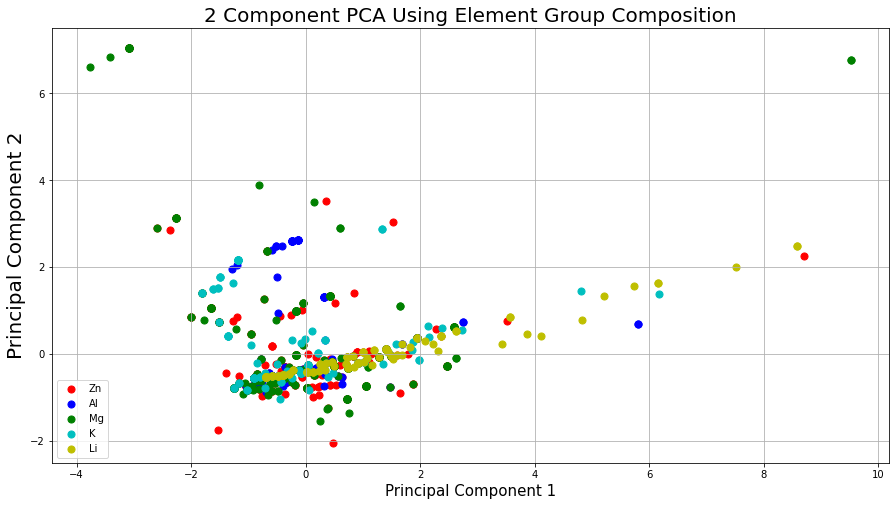

In [31]:
features = ['n_alkaline_earth_metals', 'n_lanthanoids', 'n_metalloids', 'n_post_transition_metals', 'n_reactive_nonmetals', 'n_transition_metals', 'n_alkali_metals', 'n_actinoids'] 
target = ['Working_Ion'] #We set this as target because we want to know if the battery atomic compositions will be enough to classify the elements into its category. 
fandt = np.concatenate((features,target),axis=0)

# New dataframe with just the columns of interest
df2 = df.loc[:, fandt]

cleaned_up=df2.fillna(0)

cleaned_up = cleaned_up.reset_index(0)

X = cleaned_up.loc[:,features]
Y = cleaned_up.loc[:,target] 

x = StandardScaler().fit_transform(X.values)

from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf[['principal component 1', 'principal component 2', 'principal component 3']], Y], axis = 1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 20)
ax.set_title('2 Component PCA Using Element Group Composition', fontsize =20)
#targets = cleaned_up.Type.unique().tolist()
targets = ['Zn', 'Al', 'Mg', 'K', 'Li']
colors =  ['r' , 'b' , 'g' , 'c', 'y' ]    
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Working_Ion'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())  

#### PCA Ex. 3: 2 Component PCA Using Avg Voltage, Specific E, Capacity, and E Density, and Element Group Composition

[0.20554381 0.17553594 0.11764267]
0.4987224196552177


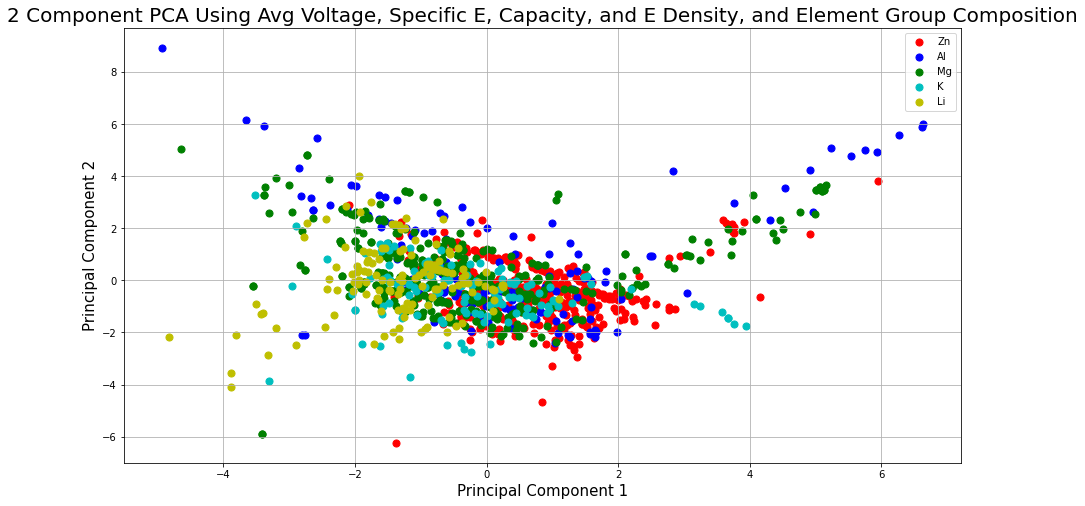

In [32]:
features = ['n_alkaline_earth_metals', 'n_lanthanoids', 'n_metalloids', 'n_post_transition_metals', 'n_reactive_nonmetals', 'n_transition_metals', 'n_alkali_metals', 'n_actinoids', 'Average Voltage', 'Capacity Grav', 'Capacity Vol','Specific E Wh/kg','E Density Wh/l'] 
target = ['Working_Ion'] #We set this as target because we want to know if the battery atomic compositions will be enough to classify the elements into its category. 
fandt = np.concatenate((features,target),axis=0)

# New dataframe with just the columns of interest
df2 = df.loc[:, fandt]

cleaned_up=df2.fillna(0)

cleaned_up = cleaned_up.reset_index(0)

X = cleaned_up.loc[:,features]
Y = cleaned_up.loc[:,target] 

x = StandardScaler().fit_transform(X.values)

from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf[['principal component 1', 'principal component 2', 'principal component 3']], Y], axis = 1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA Using Avg Voltage, Specific E, Capacity, and E Density, and Element Group Composition', fontsize = 20)
#targets = cleaned_up.Type.unique().tolist()
targets = ['Zn', 'Al', 'Mg', 'K', 'Li']
colors =  ['r' , 'b' , 'g' , 'c', 'y' ]    
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Working_Ion'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())  

#### PCA Ex. 4: 2 Component PCA Using Avg Voltage, Specific E, Capacity, and E Density

[0.50905678 0.38375041 0.07334078]
0.966147976265298


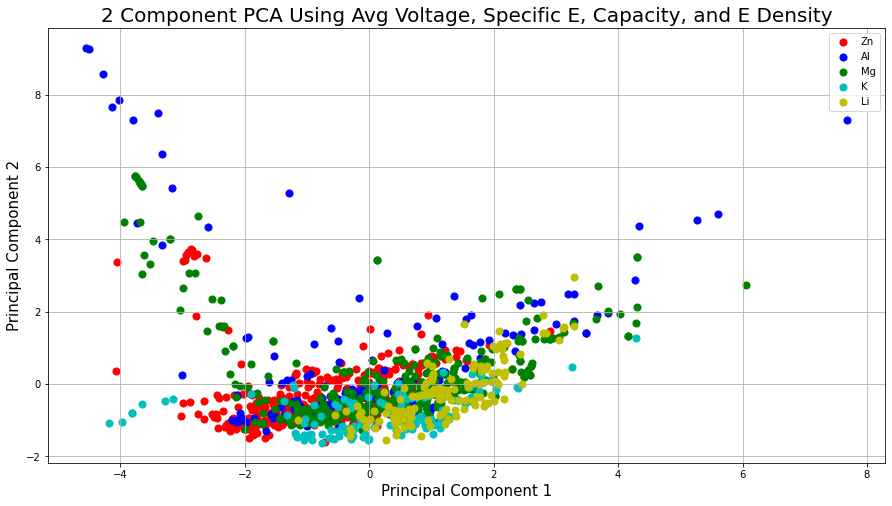

In [33]:
features = ['Average Voltage', 'Capacity Grav', 'Capacity Vol','Specific E Wh/kg','E Density Wh/l'] 
target = ['Working_Ion'] #We set this as target because we want to know if the battery atomic compositions will be enough to classify the elements into its category. 
fandt = np.concatenate((features,target),axis=0)

# New dataframe with just the columns of interest
df2 = df.loc[:, fandt]

cleaned_up=df2.fillna(0)

cleaned_up = cleaned_up.reset_index(0)

X = cleaned_up.loc[:,features]
Y = cleaned_up.loc[:,target] 

x = StandardScaler().fit_transform(X.values)

from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf[['principal component 1', 'principal component 2', 'principal component 3']], Y], axis = 1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA Using Avg Voltage, Specific E, Capacity, and E Density', fontsize = 20)
#targets = cleaned_up.Type.unique().tolist()
targets = ['Zn', 'Al', 'Mg', 'K', 'Li']
colors =  ['r' , 'b' , 'g' , 'c', 'y' ]    
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Working_Ion'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())  

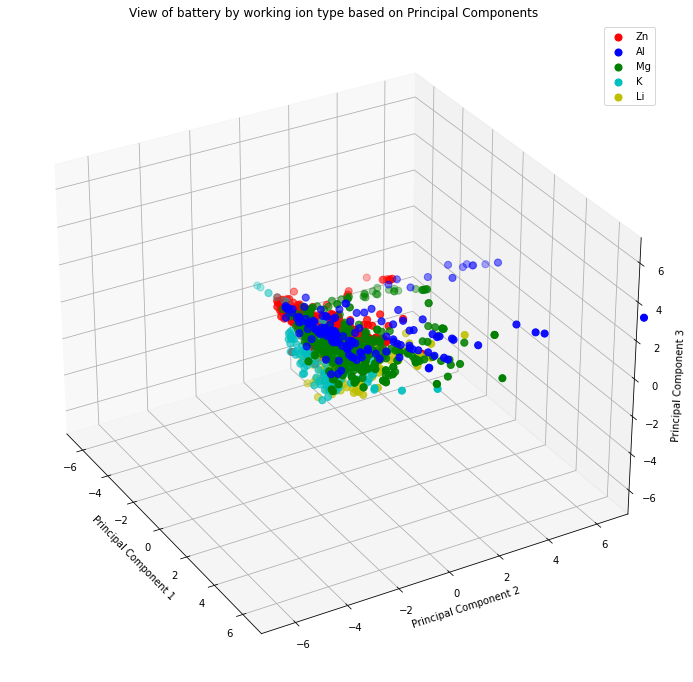

In [34]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d',zlim = [-7,7],ylim = [-7,7],xlim= [-7,7])

targets = ['Zn', 'Al', 'Mg', 'K', 'Li']
colors =  ['r' , 'b' , 'g' , 'c', 'y' ]  

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Working_Ion'] == target
    PT = ax.scatter3D(finalDf.loc[indicesToKeep, 'principal component 1'],
                      finalDf.loc[indicesToKeep, 'principal component 2'],
                      finalDf.loc[indicesToKeep, 'principal component 3'],
                      c = color,
                      s=50
                     )
ax.view_init(30,-30)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('View of battery by working ion type based on Principal Components')
ax.legend(targets)

Here we can see that the greatest variance comes from Component 1, and that the working ions tend to cluster together, with some outliers for Li in Component 2 and Mg and AL in Component 1. 

Next, we will use the reduced data with kmeans clustering, for a deeper look at the data. In this step, we will use k-means clustering to view the top three PCA components by first fitting the components and then finding the best number of clusters through the elbow and silhouette method. 

In [35]:
!pip install kneed #starting from this week, we have more packages that need to be installed manually into JupyterLab
import numpy as np
import pandas as pd
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

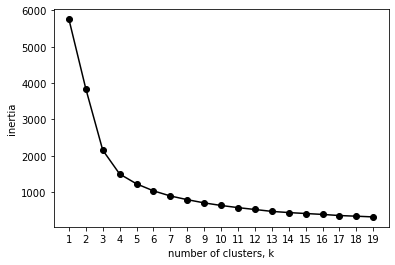

In [36]:
ks = range(1, 20)
inertias = []
for k in ks:
    
    model = KMeans(n_clusters=k)
    
    model.fit(finalDf.iloc[:,:3])
    
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X.values)

n_clusters = 20
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

clusterer = KMeans(n_clusters,**kmeans_kwargs)
clusterer.fit(scaled_features)    

KMeans(init='random', n_clusters=20, random_state=42)

In [95]:
sse = []
for k in range(1, 20):
    clusterer = KMeans(n_clusters=k, **kmeans_kwargs)
    clusterer.fit(scaled_features)
    sse.append(clusterer.inertia_)
## Find the elbow point
kl = KneeLocator(
    range(1, 20), sse, curve="convex", direction="decreasing"
)

print("Optimal number of clusters based on elbow method: ", kl.elbow)    

Optimal number of clusters based on elbow method:  4


To find the optimal number of clusters using the silhouette method:

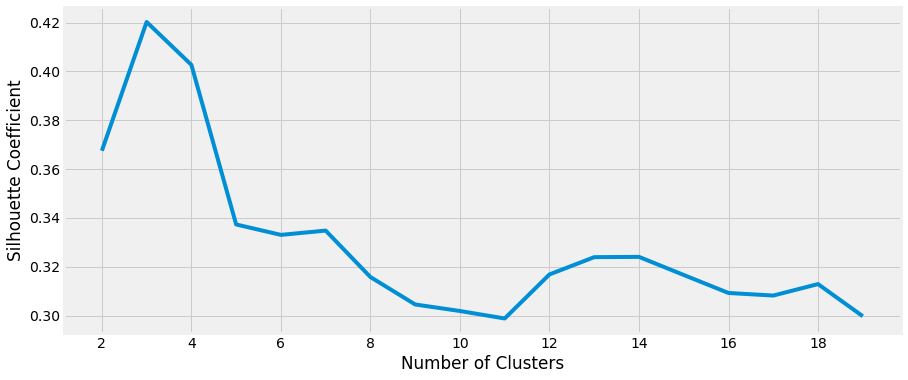

In [96]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 20):
    clusterer = KMeans(n_clusters=k, **kmeans_kwargs)
    clusterer.fit(scaled_features)
    score = silhouette_score(scaled_features, clusterer.labels_)
    silhouette_coefficients.append(score)
  
fi = plt.figure(figsize=(15,6))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20,2))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
    

From this, the optimum number of clusters appears to be 8.

To see what the clusters are:


In [97]:
kmeans = KMeans(n_clusters=8,random_state=55).fit(finalDf.iloc[:,:3])
finalDf[kmeans.labels_==2]

,principal component 1,principal component 2,principal component 3,Working_Ion
2,0.128172,-0.833832,-0.404863,Zn
8,-1.032787,-0.914485,0.213967,Zn
9,-0.143748,-0.763279,-0.182051,Zn
13,-1.082414,-0.922493,0.235219,Zn
18,-1.031432,-0.745870,0.269044,Zn
...,...,...,...,...
1158,-0.377991,-0.735680,-0.072911,Li
1161,-0.131543,-0.775997,-0.193115,Li
1163,-0.036821,-1.025387,-0.478792,Li
1169,0.085167,-1.216782,-0.815951,Li


In [ ]:
kmeans.labels_

#### PCA Analysis
In our project proposal, we created scatter plots color coded by working ion that showed, for example, Average Voltage vs. Specific E, Average Voltage vs. Capacity Vol, and Average Voltage vs. E Density. With PCA, we are able to plot all of these features on one two dimensional graph, with the least important features dropped to reduce dimensionality, leaving the most valuable variables and information behind. The ion clusters are composites of all the training features, with the working ions as the outputs. 

As the features used to train the PCA increase the amount of information being conveyed (atomic composition gives less information for categorization than element group composition), the explained variance ratio increases. By adding additional components, the sum of the explained variance ratio increases. Since maximizing the variance preserves as much variability as possible, and therefore preserves the input information as the features are reduced, we are aiming towards the highest sum of explained variance. In the first example with just atomic inputs, there is not much variation, since the majority are 0 value. There is greater variation as the battery compositions are arranged by group, and when other features like Voltage and Capacity are introduced. Interestingly, the plot with the most features had a lower variance, while the plot with the five principal features (Voltage, etc.) had the highest variance, 0.966147976. The variance of this last example might suggest overfitting.

From the 3D plot of the last example, we can see that the greatest variance comes from Component 1, and that the working ions tend to cluster together, with some outliers for Li in Component 2 and Mg and Al in Component 1. 

Another advantage of PCA is that once the features have been reduced, it can be used in concert with other unsupervised machine learning methods like KMeans clustering or SOM. When SOM was attempted prior to feature reduction, it was difficult to see defined groups or patterns. Obvious clusters on the SOM maps were not evident either. Using the reduced PCA would enable further separation of the dataset with KMeans, using 8 clusters.



PCA permitted all the features to be plotted together, with greater separation between working ion groups due to the maximized variance. Further analysis could be done on the Kmeans clusters, to see how these differ from the PCA groupings. 



### Method 5. K-Nearest Neighbors

In [110]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


#### 1. KNN using all atoms individually as a feature matrix

First, prediction is calculated using all elemental compositions individually.

In [111]:
encoders = {
    'Reduced Cell Formula': preprocessing.LabelEncoder(),
    'e_density_level_overall': preprocessing.LabelEncoder(),
    'specific_e_level_overall': preprocessing.LabelEncoder(),
    'C_vol_level_overall': preprocessing.LabelEncoder(),
    'C_grav_level_overall': preprocessing.LabelEncoder(),
    'V_level_overall': preprocessing.LabelEncoder(),
    'Working Ion': preprocessing.LabelEncoder(),
}

for label, encoder in encoders.items():
    encoder.fit(df[label])
    df[label] = encoder.transform(df[label])

In [112]:
df.keys()

Index(['Reduced Cell Formula', 'Working Ion', 'nZn_max', 'nAl_max', 'nMg_max', 'nK_max', 'nLi_max', 'n_alkaline_earth_metals', 'n_lanthanoids', 'n_metalloids', 'n_post_transition_metals', 'n_reactive_nonmetals', 'n_transition_metals', 'n_alkali_metals', 'n_actinoids', 'nBe', 'nSr', 'nBa', 'nCa', 'nPr', 'nHo', 'nCe', 'nTb', 'nGd', 'nLa', 'nLu', 'nNd', 'nSi', 'nGe', 'nTe', 'nSb', 'nAs', 'nSn', 'nBi', 'nGa', 'nO', 'nP', 'nS', 'nF', 'nI', 'nSe', 'nN', 'nH', 'nCl', 'nBr', 'nCu', 'nV', 'nFe', 'nTi', 'nCr', 'nMn', 'nNi', 'nCo', 'nW', 'nMo', 'nTa', 'nNb', 'nZr', 'nSc', 'nRe', 'nIr', 'nAg', 'nTc', 'nY', 'nNa', 'nLi', 'nRb', 'nCs', 'nU', 'Average Voltage', 'V_level_overall', 'Capacity Grav', 'C_grav_level_overall', 'Capacity Vol', 'C_vol_level_overall', 'Specific E Wh/kg', 'specific_e_level_overall', 'E Density Wh/l', 'e_density_level_overall', 'Working_Ion_Number', 'Working_Ion'], dtype='object')

In [113]:
variables = ['nZn_max', 'nAl_max', 'nMg_max', 'Working Ion',
       'nK_max', 'nLi_max', 'nBe', 'nSr', 'nBa', 'nCa', 'nPr', 'nHo', 'nCe', 
       'nTb', 'nGd', 'nLa', 'nLu', 'nNd', 'nSi', 'nGe', 'nTe', 'nSb', 'nAs', 
       'nSn', 'nBi', 'nGa', 'nO', 'nP', 'nS', 'nF', 'nI', 'nSe', 'nN', 'nH', 
       'nCl', 'nBr', 'nCu', 'nV', 'nFe', 'nTi', 'nCr', 'nMn', 'nNi', 'nCo', 
       'nW', 'nMo', 'nTa', 'nNb', 'nZr', 'nSc', 'nRe', 'nIr', 'nAg', 'nTc', 
       'nY', 'nNa', 'nLi', 'nRb', 'nCs', 'nU']

targets = ['V_level_overall', 'C_grav_level_overall', 'C_vol_level_overall', 'specific_e_level_overall', 'e_density_level_overall',]

In [114]:
x_train, x_test, y_train, y_test = train_test_split(df[variables],df[targets],test_size=0.1,random_state=55)

In [115]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [116]:
metric_df = [ ]
for target in targets:
     y_train_subset = y_train[target]
     y_test_subset = y_test[target]
     classifier = KNeighborsClassifier(n_neighbors=5)
     classifier.fit(x_train, y_train_subset)
     train_score = classifier.score(x_train, y_train_subset)
     test_score = classifier.score(x_test, y_test_subset)
     metric_df.append({'Target': target, 'Train Score': train_score, 'Test Score': test_score})

pd.DataFrame(metric_df).set_index('Target')

,Train Score,Test Score
Target,,
V_level_overall,0.844071,0.683333
C_grav_level_overall,0.971055,0.950000
C_vol_level_overall,0.965453,0.941667
specific_e_level_overall,0.860878,0.841667
e_density_level_overall,0.848739,0.791667


The results above show the train and test scores using all elements as a feature matrix in the K-Nearest Neighbors Prediction

#### 2. KNN using working ions and elemental groups as a feature matrix

Next, the working ions and elemental groups are used as a feature array to see if this improves the prediction since some elements do not have very many datapoints

In [117]:
variables = ['nZn_max', 'nAl_max', 'nMg_max', 'nK_max', 'nLi_max', 'n_alkaline_earth_metals', 'n_lanthanoids', 'n_metalloids', 'n_post_transition_metals', 
                        'n_reactive_nonmetals', 'n_transition_metals', 'n_alkali_metals', 'n_actinoids' ]

targets = ['V_level_overall', 'C_grav_level_overall', 'C_vol_level_overall', 'specific_e_level_overall', 'e_density_level_overall',]

In [118]:
x_train, x_test, y_train, y_test = train_test_split(df[variables],df[targets],test_size=0.1,random_state=55)

In [119]:
metric_df = [ ]
for target in targets:
     y_train_subset = y_train[target]
     y_test_subset = y_test[target]
     classifier = KNeighborsClassifier(n_neighbors=5)
     classifier.fit(x_train, y_train_subset)
     train_score = classifier.score(x_train, y_train_subset)
     test_score = classifier.score(x_test, y_test_subset)
     metric_df.append({'Target': target, 'Train Score': train_score, 'Test Score': test_score})

pd.DataFrame(metric_df).set_index('Target')

,Train Score,Test Score
Target,,
V_level_overall,0.830065,0.700000
C_grav_level_overall,0.976657,0.958333
C_vol_level_overall,0.969188,0.950000
specific_e_level_overall,0.853408,0.800000
e_density_level_overall,0.837535,0.775000


The results show that the training scores are improved and the test scores vary. Grouping by elemental group gives more strength in predicting the battery properties by lending more power the elements that don't have many datapoints relative to the entire set of data

#### 3. KNN using elemental groups only as a feature matrix

What about using only the elemental groups and not the working ion?

In [120]:
variables = ['n_alkaline_earth_metals', 'n_lanthanoids', 'n_metalloids', 'n_post_transition_metals', 
                        'n_reactive_nonmetals', 'n_transition_metals', 'n_alkali_metals', 'n_actinoids' ]

targets = ['V_level_overall', 'C_grav_level_overall', 'C_vol_level_overall', 'specific_e_level_overall', 'e_density_level_overall',]

In [121]:
x_train, x_test, y_train, y_test = train_test_split(df[variables],df[targets],test_size=0.1,random_state=55)

In [122]:
metric_df = [ ]
for target in targets:
     y_train_subset = y_train[target]
     y_test_subset = y_test[target]
     classifier = KNeighborsClassifier(n_neighbors=5)
     classifier.fit(x_train, y_train_subset)
     train_score = classifier.score(x_train, y_train_subset)
     test_score = classifier.score(x_test, y_test_subset)
     metric_df.append({'Target': target, 'Train Score': train_score, 'Test Score': test_score})

pd.DataFrame(metric_df).set_index('Target')

,Train Score,Test Score
Target,,
V_level_overall,0.725490,0.566667
C_grav_level_overall,0.958917,0.941667
C_vol_level_overall,0.945845,0.916667
specific_e_level_overall,0.802988,0.750000
e_density_level_overall,0.772176,0.725000


Using the elemental groups alone has the lowest train and test scores but it is surprisingly not bad considering the working ion is not taken into consideration in this.

#### 4. Visualization of KNN accuracy for elemental groups and working ions

Visualization by working ion is shown below. For simplicity in visualization each working ion is visualized with the elemental groups to compare how the different elemental groups influence the prediction for each working ion

In [123]:
y1_matrix = []
Zn_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nZn_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['V_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Zn_accuracy_matrix.append(accuracy)
    #print(accuracy)


In [124]:
y1_matrix = []
Al_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nAl_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['V_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Al_accuracy_matrix.append(accuracy)
    #print(accuracy)

In [125]:
y1_matrix = []
Mg_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nMg_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['V_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Mg_accuracy_matrix.append(accuracy)
    #print(accuracy)

In [126]:
y1_matrix = []
K_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nK_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['V_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    K_accuracy_matrix.append(accuracy)
    #print(accuracy)

In [127]:
y1_matrix = []
Li_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nLi_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['V_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Li_accuracy_matrix.append(accuracy)
    #print(accuracy)

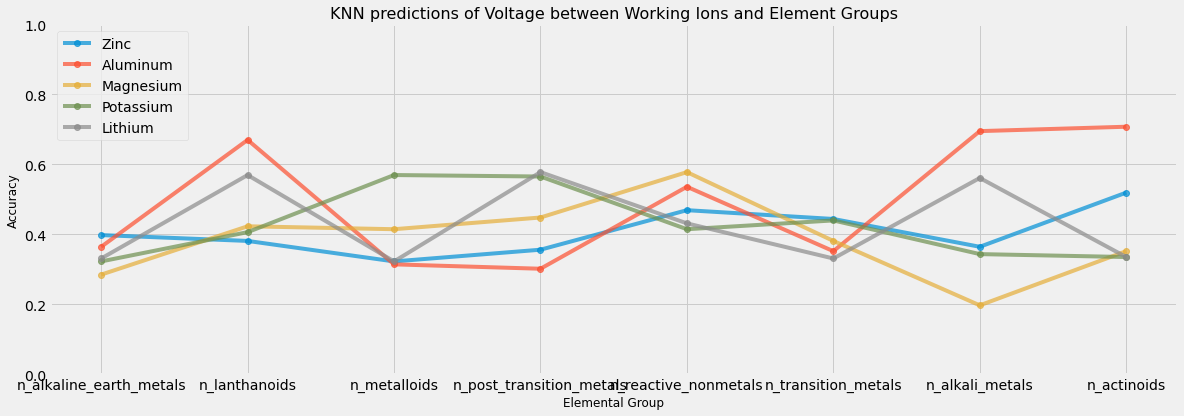

In [128]:
plt.figure(figsize = (18,6))  
plt.title('KNN predictions of Voltage between Working Ions and Element Groups', size = 16)
plt.plot(y1_matrix, Zn_accuracy_matrix, '-o', alpha = .7, label = 'Zinc')
plt.plot(y1_matrix, Al_accuracy_matrix, '-o', alpha = .7, label = 'Aluminum')
plt.plot(y1_matrix, Mg_accuracy_matrix, '-o', alpha = .7, label ='Magnesium')
plt.plot(y1_matrix, K_accuracy_matrix, '-o', alpha = .7, label ='Potassium')
plt.plot(y1_matrix, Li_accuracy_matrix, '-o', alpha = .7, label ='Lithium')
plt.ylim(0,1)
plt.ylabel('Accuracy', size = 12)
plt.xlabel('Elemental Group', size = 12)
plt.legend()

In [129]:
y1_matrix = []
Zn_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nZn_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['C_vol_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Zn_accuracy_matrix.append(accuracy)
    #print(accuracy)

In [130]:
y1_matrix = []
Al_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nAl_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['C_vol_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Al_accuracy_matrix.append(accuracy)
    #print(accuracy)

In [131]:
y1_matrix = []
Mg_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nMg_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['C_vol_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Mg_accuracy_matrix.append(accuracy)
    #print(accuracy)

In [132]:
y1_matrix = []
K_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nK_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['C_vol_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    K_accuracy_matrix.append(accuracy)
    #print(accuracy)

In [133]:
y1_matrix = []
Li_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nLi_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['C_vol_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Li_accuracy_matrix.append(accuracy)
    #print(accuracy)

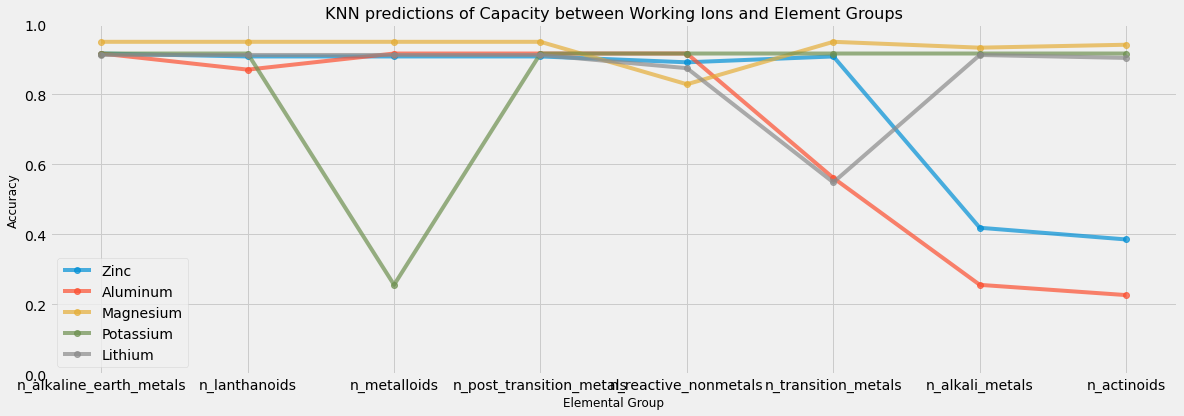

In [134]:
plt.figure(figsize = (18,6))  
plt.title('KNN predictions of Capacity between Working Ions and Element Groups', size = 16)
plt.plot(y1_matrix, Zn_accuracy_matrix, '-o', alpha = .7, label = 'Zinc')
plt.plot(y1_matrix, Al_accuracy_matrix, '-o', alpha = .7, label = 'Aluminum')
plt.plot(y1_matrix, Mg_accuracy_matrix, '-o', alpha = .7, label ='Magnesium')
plt.plot(y1_matrix, K_accuracy_matrix, '-o', alpha = .7, label ='Potassium')
plt.plot(y1_matrix, Li_accuracy_matrix, '-o', alpha = .7, label ='Lithium')
plt.ylim(0,1)
plt.ylabel('Accuracy', size = 12)
plt.xlabel('Elemental Group', size = 12)
plt.legend()

In [135]:
y1_matrix = []
Zn_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nZn_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['specific_e_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Zn_accuracy_matrix.append(accuracy)
    #print(accuracy)

In [136]:
y1_matrix = []
Al_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nAl_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['specific_e_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Al_accuracy_matrix.append(accuracy)
    #print(accuracy)

In [137]:
y1_matrix = []
Mg_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nMg_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['specific_e_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Mg_accuracy_matrix.append(accuracy)
    #print(accuracy)

In [138]:
y1_matrix = []
K_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nK_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['specific_e_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    K_accuracy_matrix.append(accuracy)
    #print(accuracy)

In [139]:
y1_matrix = []
Li_accuracy_matrix = []

for i in range(7,15):
    y1 = df.columns[i]
    x_knn = df[['nLi_max', y1]]
    x_knn = x_knn.dropna()
    y_knn = df['specific_e_level_overall']
    y_knn = y_knn.dropna()

    x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(x_knn,y_knn,test_size=0.2,random_state=55)

    scaler = StandardScaler().fit(x_trainknn)

    x_trainknn = pd.DataFrame(data=scaler.transform(x_trainknn),columns=x_knn.columns)
    x_testknn = pd.DataFrame(data=scaler.transform(x_testknn),columns=x_knn.columns)
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(x_trainknn,y_trainknn)

    y_predictknn = knn_model.predict(x_testknn) 
    
    #getting test accuracy
    #print(y1)
    y1_matrix.append(y1)
    accuracy = knn_model.score(x_testknn,y_testknn)
    Li_accuracy_matrix.append(accuracy)
    #print(accuracy)

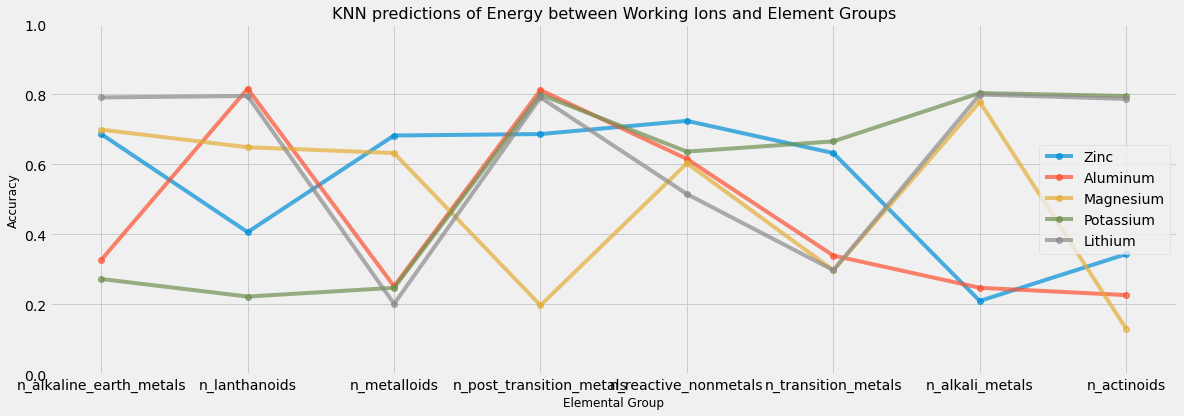

In [140]:
plt.figure(figsize = (18,6))  
plt.title('KNN predictions of Energy between Working Ions and Element Groups', size = 16)
plt.plot(y1_matrix, Zn_accuracy_matrix, '-o', alpha = .7, label = 'Zinc')
plt.plot(y1_matrix, Al_accuracy_matrix, '-o', alpha = .7, label = 'Aluminum')
plt.plot(y1_matrix, Mg_accuracy_matrix, '-o', alpha = .7, label ='Magnesium')
plt.plot(y1_matrix, K_accuracy_matrix, '-o', alpha = .7, label ='Potassium')
plt.plot(y1_matrix, Li_accuracy_matrix, '-o', alpha = .7, label ='Lithium')
plt.ylim(0,1)
plt.ylabel('Accuracy', size = 12)
plt.xlabel('Elemental Group', size = 12)
plt.legend()

#### KNN Analysis

The first step in the KNN analysis (Sections 1-3) used different combinations of the composition of the batteries to predict the performance metrics of the battery- voltage, energy, and capacity. All columns of atoms were first used to predict performance. These were decent predictors of the properties with train and test scores, but the concern in this prediction was the amount of zeroes in the data since there are so few datapoints for some elements. The prediction was improved when the non-working ion elements were grouped into subgroups based off their similar properites. Most notably, capacitance has a great train and test score of over .95 using these parameters. The last KNN test involved using only the elemental groups and no working ion compositions to predict the performance parameters. This peformed the worst unsurprisingly since the working ion is the most important feature. But some features still had surprisingly high values like capacitance.


The second portion of the KNN analysis (Section 4) visualized how important each elemental group was in predicting the properties for each working ion. The accuracy of using each group generally vary quite a bit at predicting battery properties depending on the working ion. The capacity curves show that the elemental group used to predict the capacity do not make much of a difference. The accuracy is fairly similar for all groups at about .9 besides a few outliers. For the voltage and energy predictions, there does not appear to be a clear trend in which group is best a predicting the properties overall- it is heavily dependent on the working ion.

## Section 4. Unsuccessful Methods

### Method 1. Neural Networks

Neural networks are a supervised machine learning method, and can perform both classification and regression. They feature three layers: the input layer, hidden layer(s), and output layer(s). During training, the neural network makes a prediction and then measures error and adjusts accordingly while passing through each layer in reverse.
This model was tested both as a way to predict features, such as Specific E Wh/kg from inputs such as Average Voltage and Capacity Grav, as well as a way to categorize the data by working ion from inputs such as Specific E Wh/kg and Average Voltage. Inputs were chosen based on their level of correlation in the features heatmap. However, the neural networks tested proved to have a high mean squared error and low test set accuracy. The categorization neural network, used to predict the Working Ion (in this case Zn) using Specific E and Average, also had a low test set accuracy of 0.6862. From these initial findings, this method was rejected as an ineffective model for dataset analysis.

####Regression Neural Network

Here we use regression to predict Specific E Wh/kg from Average Voltage and Capacity Grav. 

In [ ]:
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib inline

from tensorflow import keras

import tensorflow as tf
import random as python_random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sp
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [ ]:
x = df[['Average Voltage', 'Capacity Grav']].values
y = df['Specific E Wh/kg'].values
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state=111)

scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

#Define a neural network model, and wrap this model in a function
def nnmodel1():
    model = Sequential()
    model.add(Dense(2, input_dim=x_train_norm.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimator = KerasRegressor(build_fn=nnmodel1) #nnmodel1 is the neural network model we defined above
history = estimator.fit(x_train_norm, y_train, validation_split=0.33, epochs=200, batch_size=32, verbose=0)

y_test_predict = estimator.predict(x_test_norm)

plt.scatter(y_test, y_test_predict)
plt.xlabel("True value of test data")
plt.ylabel("Predicted value of test data")
plt.plot(np.arange(min(y_test),max(y_test),0.01),np.arange(min(y_test),max(y_test),0.01),c='orange')
plt.grid()

print("final MSE for train is %.2f and for validation is %.2f" %
      (history.history['loss'][-1], history.history['val_loss'][-1]))

test_loss = estimator.model.evaluate(x_test_norm, y_test)
print("test set mse is %.2f" % test_loss)

####Neural Network for Characterization

Here we predict Working Ion from Specific E and Average Voltage.

In [ ]:
x = df[['Specific E Wh/kg','Average Voltage']].values
y = df['Working_Ion_Number'].copy()

for i in range(len(df)):
    if df['Working_Ion_Number'][i] in ['2', '3', '4', '5']:
        y[i] = 'Other'
        
labels_map = {'1':0,'Other':1}
y_int = y.map(labels_map) 

x_train, x_test, y_train, y_test = train_test_split(x, y_int,
                                                    test_size=0.20,
                                                    random_state=111)

scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

def binary_nn():
    model = Sequential()
    #here we make an explicit input layer, it simply passes the input data to the later layer
    model.add(Input(shape=x_train_norm.shape[1]))
    #hidden layers
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    #output layer
    #for binary classification,we use sigmoid and 1 neuron in the output layer
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

#create a model object
classifier = binary_nn()

history3 = classifier.fit(x_train_norm, y_train, validation_split=0.33, epochs=200, batch_size=32,verbose=0)

y_test_predict = (classifier.predict(x_test_norm) > 0.5).astype("int32")

test_loss = classifier.evaluate(x_test_norm, y_test)
print("test set accuracy is %.4f" % test_loss[1])

pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Here we plot Zn as '1' (blue) and the other Working Ions as 'Other' (red). 

In [ ]:
binarize = {'1':0,'Other':1}

#create a model object
classifier = binary_nn()


# create a meshgrid
xx, yy = np.meshgrid(np.arange(-4, 6, 0.05),
                     np.arange(-4, 4, 0.05))

# classify each points in the grid
z = (classifier.predict(np.c_[xx.ravel(), yy.ravel()])>0.5).astype("int32")
z = np.around(z)
z = z.reshape(xx.shape)

#plot the meshgrid
#The points classified to class 1 are shown in red
#the points classified to class 0 are shown in blue
plt.figure(figsize=(8,6),dpi=250)
plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.4)

classifier_predict_results = pd.DataFrame({"Specific E Wh/kg":x_test_norm[:,0], 'Average Voltage':x_test_norm[:,1], 'prediction':y_test_predict[:,0] 
                                          })


classifier_train_results = pd.DataFrame({"Specific E Wh/kg":x_train_norm[:,0], 'Average Voltage':x_train_norm[:,1], 'training data':y_train
                                          })


scatter1 = sns.scatterplot(x="Specific E Wh/kg",y='Average Voltage', data=classifier_train_results,
                hue='training data', hue_order=[0,1], legend=False)
                                               

scatter2 = sns.scatterplot(x="Specific E Wh/kg",y='Average Voltage', data=classifier_predict_results,
                hue='prediction', marker='X', hue_order=[0,1], legend=False)   


legend_elements = [plt.scatter([0],[0],marker='o',color='tab:blue',label='Excellent, Training Data'),
                   plt.scatter([0],[0],marker='o',color='tab:orange',label='Other, Training Data'),
                
                   plt.scatter([0],[0],marker='X',color='tab:blue',label='Excellent, Prediction'),
                   plt.scatter([0],[0],marker='X',color='tab:orange',label='Other, Prediction')]

plt.legend(handles=legend_elements, loc='lower right')

plt.show()

### Method 2. SOM

The SOM method, or Self-Organizing-Map method, is an unsupervsied maching learning method, and is useful in the analysis of large datasets with many properties. It uses clustering to group similar data togther, reducing higher dimensional data by mapping datapoints by topographical proximity based on similarities between datapoints. This method was expected to help us see what groupings emerged from the battery composition data that we added to the initial dataset. This method was postulated to be an effective way to capture the contributions from the battery features and compositions. Because there is no target output in an SOM, clusters form based on input vectors. The SOM here was trained with Average Voltage, Capacity Grav, Capacity Vol, Specific E Wh/kg, and E Density Wh/l and battery compositions by element group. 

However, no clear clusters formed. Various map sizes were tried, ranging from 25 to 200, and there were no clear patterns. It was difficult to see where or why clusters were forming. This method was likewise discarded for not improving the visualization. 

In [ ]:
! pip install minisom

import minisom
from minisom import MiniSom
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

sub = df[['Reduced Cell Formula', 'Working_Ion', 'Working_Ion_Number', 'n_alkaline_earth_metals', 'n_lanthanoids','n_metalloids', 'n_post_transition_metals', 'n_reactive_nonmetals', 'n_transition_metals', 'n_alkali_metals', 'n_actinoids', 'Average Voltage', 'Capacity Grav', 'Capacity Vol', 'Specific E Wh/kg', 'E Density Wh/l']].copy()
sub.dropna(inplace=True)

# Set a new index of this subset data
sub['index']=list(range(len(sub)))
sub.set_index('index',drop=True,inplace=True)

traindata = sub[['n_alkaline_earth_metals', 'n_lanthanoids','n_metalloids', 'n_post_transition_metals', 'n_reactive_nonmetals', 'n_transition_metals', 'n_alkali_metals', 'n_actinoids', 'Average Voltage', 'Capacity Grav', 'Capacity Vol', 'Specific E Wh/kg', 
       'E Density Wh/l']].values
traindata = (traindata - np.mean(traindata, axis=0)) / np.std(traindata, axis=0)

# Define a SOM
height = 25
width = 25
# Define a MiniSom object
som1 = MiniSom(width, height, traindata.shape[1], sigma=1.0, learning_rate=0.5,neighborhood_function='gaussian', random_seed=0) 

# Initialize the weights by PCA
som1.pca_weights_init(traindata)

# trains the SOM with 5000 iterations
som1.train(traindata, 5000) 

print('Topographic error: ', som1.topographic_error(traindata))
print('Quantization error: ', som1.quantization_error(traindata))

fig9 = plt.figure(figsize=(10, 10),dpi=300)
ax = fig9.add_subplot(111)

for index, datapoint in enumerate(traindata):
    w = som1.winner(datapoint)  
    
    #add a random offset to their coordinate in the grid
    x_coord = w[0]+np.random.uniform(0.25,0.75)
    y_coord = w[1]+np.random.uniform(0.25,0.75)
    
    # color-encode by Group
    # the 'index' corresponds to the index in the training dataset

    if sub.iloc[index]['Working_Ion_Number']==1:
        plt.scatter(x_coord,y_coord,c='red',s=50)
    else:
        plt.scatter(x_coord,y_coord,c='blue',s=2)
 
    
    # add label next to each point.
    plt.text(x_coord+0.05,y_coord+0.05,sub.iloc[index]['Working_Ion'],
            horizontalalignment='left', verticalalignment='bottom',
            rotation=45, fontsize=7, weight='semibold')
    
plt.ylim(0,26)
plt.xlim(0,26)
plt.title("SOM by Composition Labelled by Working Ion")
ax.set_xticks(range(0,25,2))
ax.set_yticks(range(0,25,2))
plt.grid()

plt.show()

To find the optimal map size:

In [ ]:
size_list = np.arange(5,25,1)
te = [0]*len(size_list)
qe = [0]*len(size_list)

for i in range(len(size_list)):
    som2 = MiniSom(size_list[i], size_list[i], traindata.shape[1], sigma=1.0, learning_rate=0.5,neighborhood_function='gaussian', random_seed=0)
    som2.pca_weights_init(traindata)
    som2.train(traindata, 5000)
    te[i] = som2.topographic_error(traindata)
    qe[i] = som2.quantization_error(traindata)
    
plt.plot(size_list,te,label='Topographic error')
plt.plot(size_list,qe,label='Quantization error')
plt.xlabel('Size of the map')
plt.ylabel('Error')
plt.title('Toprographic and Quanitization Error by Map Size')
plt.legend()
plt.show()


## Section 5. Overall Conclusions/Future Studies

Our initial hypothesis was that the chemical composition of the battery could affect the various batteries could affect the performance parameters- voltage, capacity, and energy. From our initial visualization we could see that the working ion had an influence on the properties of the batteries and our machine learning techniques confirmed this. We also theorized that the other elements in the battery makeup had an influence on the properties. This was confirmed through PCA and KNN studies. Using all predictors in KNN, the battery properties of voltage, capacity, and energy could be reasonably sorted into high, medium, and low categories. Through KNN it was also shown that using combinations of the working ion and different element groups had varying impact on the predictions. Whether an element group was good at predicting the working ion's properties varied with each element. 

The machine learning techniques presented here give us a baseline for understanding how battery properties and composition are related. For future studies, it would be intresting to do a further analysis into why some element groups and not others have more of an influence on the battery's properties. 